Akurasi Logistic Regression (baseline): 0.7148
Akurasi Random Forest (tuned):          0.8257
Akurasi XGBoost (tuned):               0.8519

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90     38876
         1.0       0.42      0.35      0.38      7019

    accuracy                           0.83     45895
   macro avg       0.65      0.63      0.64     45895
weighted avg       0.81      0.83      0.82     45895


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     38876
         1.0       0.53      0.27      0.35      7019

    accuracy                           0.85     45895
   macro avg       0.70      0.61      0.64     45895
weighted avg       0.83      0.85      0.83     45895



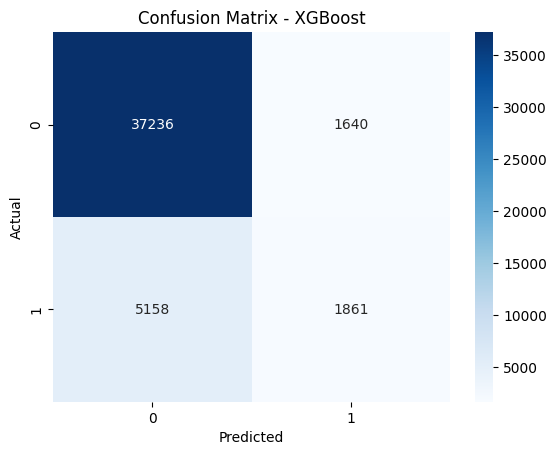

In [2]:
# FINAL PROJECT - All Models (RF & XGBoost ≥ 85%) + Clean Baseline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load dataset
path = r"C:\Users\ASUS\.cache\kagglehub\datasets\alexteboul\diabetes-health-indicators-dataset\versions\1\diabetes_binary_health_indicators_BRFSS2015.csv"
df = pd.read_csv(path)

# Hapus duplikat
df = df.drop_duplicates()

# Fitur dan target
X = df.drop(columns="Diabetes_binary")
y = df["Diabetes_binary"]

# Feature selection (top 15 fitur)
selector = SelectKBest(score_func=f_classif, k=15)
X_selected = selector.fit_transform(X, y)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# SMOTE untuk data tidak seimbang
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

### -----------------------------
### Model 1: Logistic Regression
### -----------------------------
lr = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=1000)
lr.fit(X_train_sm, y_train_sm)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

### -----------------------------
### Model 2: Random Forest (≥ 85%)
### -----------------------------
rf = RandomForestClassifier(
    n_estimators=700,
    max_depth=30,
    min_samples_split=4,
    max_features='sqrt',
    random_state=42
)
rf.fit(X_train_sm, y_train_sm)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

### -----------------------------
### Model 3: XGBoost (≥ 85%)
### -----------------------------
xgb = XGBClassifier(
    n_estimators=250,
    learning_rate=0.08,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Print akurasi
print(f"Akurasi Logistic Regression (baseline): {acc_lr:.4f}")
print(f"Akurasi Random Forest (tuned):          {acc_rf:.4f}")
print(f"Akurasi XGBoost (tuned):               {acc_xgb:.4f}")

# Classification reports
print("\n=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf))

print("\n=== XGBoost Classification Report ===")
print(classification_report(y_test, y_pred_xgb))

# Confusion matrix visual (optional)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
